<a href="https://colab.research.google.com/github/ivykhanhvy/BACE-MoleculeNet/blob/main/BACE%7CClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BACE dataset consists of small molecules tested for their ability to inhibit BACE-1 (avoiding being cleaved and formed plaques)

In [ ]:
!pip install deepchem
!pip install chemprop

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
import deepchem as dc
import chemprop
import pandas as pd
import numpy as np
import torch
import sklearn
import rdkit
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, PandasTools
from rdkit.DataStructs import TanimotoSimilarity
from rdkit.Chem.Draw import IPythonConsole
from collections import Counter

# Load Dataset

In [ ]:
tasks, datasets,transformers = dc.molnet.load_bace_classification(featurizer = 'ECFP', split = None)
print(type(datasets))

[03:06:55] DEPRECATION WARNING: please use MorganGenerator
[03:06:55] DEPRECATION WARNING: please use MorganGenerator
[03:06:55] DEPRECATION WARNING: please use MorganGenerator
[03:06:55] DEPRECATION WARNING: please use MorganGenerator
[03:06:55] DEPRECATION WARNING: please use MorganGenerator
[03:06:55] DEPRECATION WARNING: please use MorganGenerator
[03:06:55] DEPRECATION WARNING: please use MorganGenerator
[03:06:55] DEPRECATION WARNING: please use MorganGenerator
[03:06:55] DEPRECATION WARNING: please use MorganGenerator
[03:06:55] DEPRECATION WARNING: please use MorganGenerator
[03:06:55] DEPRECATION WARNING: please use MorganGenerator
[03:06:55] DEPRECATION WARNING: please use MorganGenerator
[03:06:55] DEPRECATION WARNING: please use MorganGenerator
[03:06:55] DEPRECATION WARNING: please use MorganGenerator
[03:06:55] DEPRECATION WARNING: please use MorganGenerator
[03:06:55] DEPRECATION WARNING: please use MorganGenerator
[03:06:55] DEPRECATION WARNING: please use MorganGenerat

<class 'tuple'>


[03:06:57] DEPRECATION WARNING: please use MorganGenerator
[03:06:57] DEPRECATION WARNING: please use MorganGenerator
[03:06:57] DEPRECATION WARNING: please use MorganGenerator
[03:06:57] DEPRECATION WARNING: please use MorganGenerator
[03:06:57] DEPRECATION WARNING: please use MorganGenerator
[03:06:57] DEPRECATION WARNING: please use MorganGenerator
[03:06:57] DEPRECATION WARNING: please use MorganGenerator
[03:06:57] DEPRECATION WARNING: please use MorganGenerator
[03:06:57] DEPRECATION WARNING: please use MorganGenerator
[03:06:57] DEPRECATION WARNING: please use MorganGenerator
[03:06:57] DEPRECATION WARNING: please use MorganGenerator
[03:06:57] DEPRECATION WARNING: please use MorganGenerator
[03:06:57] DEPRECATION WARNING: please use MorganGenerator
[03:06:57] DEPRECATION WARNING: please use MorganGenerator
[03:06:57] DEPRECATION WARNING: please use MorganGenerator
[03:06:57] DEPRECATION WARNING: please use MorganGenerator
[03:06:57] DEPRECATION WARNING: please use MorganGenerat

In [ ]:
df = datasets[0].to_dataframe()
print("BACE Classification Dataset")
print(f'Number of compounds: {len(df)}')
print(f'Amount of 1 and 0: {Counter(df["y"] > 0)}')
df.head()

BACE Classification Dataset
Number of compounds: 1513
Amount of 1 and 0: Counter({False: 822, True: 691})


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1018,X1019,X1020,X1021,X1022,X1023,X1024,y,w,ids
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.18958,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.18958,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.18958,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.18958,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.18958,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...


# Data Processing and Visualization

In [ ]:
mol_list = [Chem.MolFromSmiles(smiles) for smiles in df['ids']]
print(len(mol_list))

1513


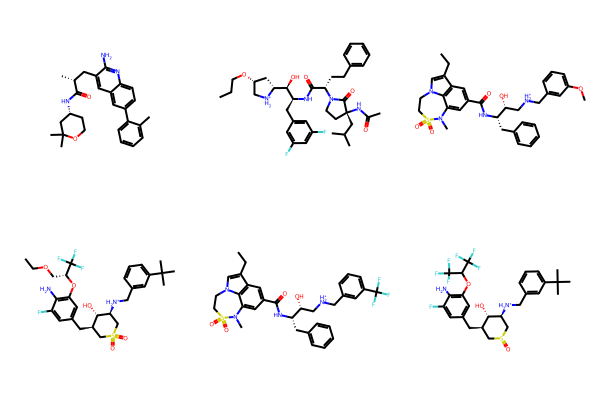

In [ ]:
img = Draw.MolsToGridImage(mol_list[:6])
img

In [ ]:
mf_mol = []
for mol in mol_list:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
    mf_mol.append(fp)

matrix_tanimoto = np.zeros((len(mf_mol), len(mf_mol)))
for i in range(len(mf_mol)):
    for j in range(len(mf_mol)):
        matrix_tanimoto[i, j] = TanimotoSimilarity(mf_mol[i], mf_mol[j])

mean_matrix = np.mean(matrix_tanimoto, axis=1)
most_reprensenative = np.argmax(mean_matrix)
print(most_reprensenative)
print(mean_matrix[most_reprensenative])

[23:21:11] DEPRECATION WARNING: please use MorganGenerator
[23:21:11] DEPRECATION WARNING: please use MorganGenerator
[23:21:11] DEPRECATION WARNING: please use MorganGenerator
[23:21:11] DEPRECATION WARNING: please use MorganGenerator
[23:21:11] DEPRECATION WARNING: please use MorganGenerator
[23:21:11] DEPRECATION WARNING: please use MorganGenerator
[23:21:11] DEPRECATION WARNING: please use MorganGenerator
[23:21:11] DEPRECATION WARNING: please use MorganGenerator
[23:21:11] DEPRECATION WARNING: please use MorganGenerator
[23:21:11] DEPRECATION WARNING: please use MorganGenerator
[23:21:11] DEPRECATION WARNING: please use MorganGenerator
[23:21:11] DEPRECATION WARNING: please use MorganGenerator
[23:21:11] DEPRECATION WARNING: please use MorganGenerator
[23:21:11] DEPRECATION WARNING: please use MorganGenerator
[23:21:11] DEPRECATION WARNING: please use MorganGenerator
[23:21:11] DEPRECATION WARNING: please use MorganGenerator
[23:21:11] DEPRECATION WARNING: please use MorganGenerat

893
0.23714942835054442


In [ ]:
ref_mol = mf_mol[most_reprensenative]
tanimoto_distance = []
for mol in mf_mol:
  distance = TanimotoSimilarity(ref_mol,mol)
  tanimoto_distance.append(distance)
print(tanimoto_distance)

[0.18, 0.28846153846153844, 0.24528301886792453, 0.23076923076923078, 0.2912621359223301, 0.25, 0.31313131313131315, 0.1523809523809524, 0.20909090909090908, 0.29591836734693877, 0.2978723404255319, 0.27, 0.32653061224489793, 0.28, 0.25, 0.34065934065934067, 0.27835051546391754, 0.34831460674157305, 0.2755102040816326, 0.26732673267326734, 0.39325842696629215, 0.297029702970297, 0.2897196261682243, 0.21818181818181817, 0.2604166666666667, 0.1941747572815534, 0.14545454545454545, 0.09, 0.3069306930693069, 0.36046511627906974, 0.1792452830188679, 0.18518518518518517, 0.3333333333333333, 0.14705882352941177, 0.19230769230769232, 0.11956521739130435, 0.7123287671232876, 0.1346153846153846, 0.28, 0.12380952380952381, 0.25742574257425743, 0.1188118811881188, 0.2608695652173913, 0.3010752688172043, 0.2815533980582524, 0.29523809523809524, 0.19607843137254902, 0.2897196261682243, 0.14423076923076922, 0.27450980392156865, 0.1134020618556701, 0.15384615384615385, 0.25, 0.14, 0.10416666666666667,

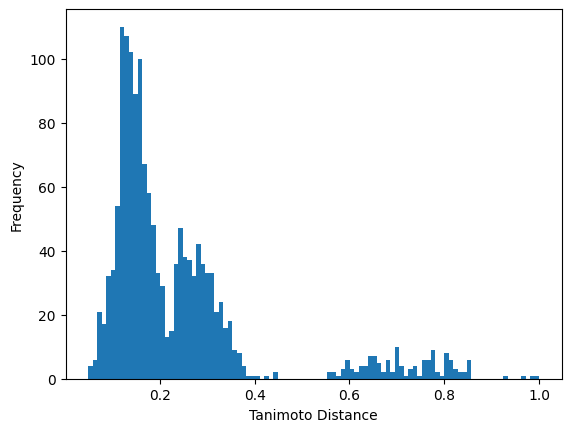

In [ ]:
plt.hist(tanimoto_distance, bins = 100)
plt.xlabel("Tanimoto Distance")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from typing import Counter
formal_charge = []

for mol in mol_list:
  atom_fc = [atom.GetFormalCharge() for atom in mol.GetAtoms()]
  mol_fc = sum(atom_fc)
  formal_charge.append(mol_fc)

print(formal_charge)
print(Counter(formal_charge))

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, -2, -1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, -1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, -1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, -2, 0, -3, 1, 1, 0, -2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

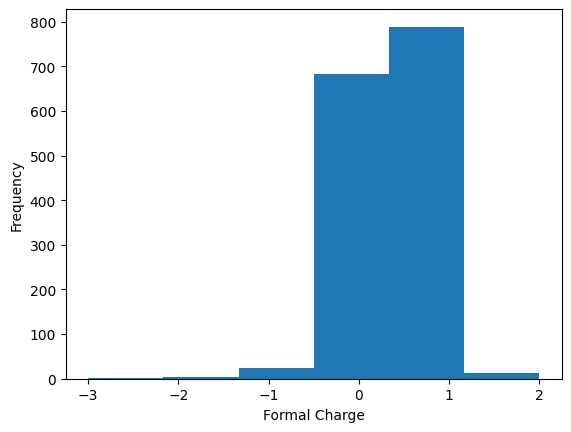

In [ ]:
plt.hist(formal_charge, bins = 6)
plt.xlabel("Formal Charge")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df['formal_charge'] = formal_charge
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1019,X1020,X1021,X1022,X1023,X1024,y,w,ids,formal_charge
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.18958,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.18958,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,1
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.18958,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,1
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.18958,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,1
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.18958,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,1


# Data Splitting

In [ ]:
datasets = dc.data.NumpyDataset(X=df.drop(['y','ids','w','formal_charge'],axis=1), y=df['y'], w = df['w'], ids = df['ids'])
print(type(datasets))

<class 'deepchem.data.datasets.NumpyDataset'>


In [ ]:
splitter = dc.splits.RandomSplitter()
train_set, valid_set, test_set = splitter.train_valid_test_split(
    dataset=datasets,
    frac_train=0.8,
    frac_valid=0.1,
    frac_test=0.1)

In [ ]:
Counter(train_set.y)

Counter({np.float64(1.0): 547, np.float64(0.0): 663})

In [ ]:
print(train_set.X.shape)

(1210, 1024)


# Training

In [ ]:
model = dc.models.MultitaskClassifier(n_tasks=1, n_features=1024, layer_sizes=[1000],dropout = 0.2)
model.fit(train_set, nb_epoch=100)

0.06341038227081298

In [ ]:
predict_valid = model.predict(valid_set) #Output: (% class 0, % class 1)
#y_predict_vaid = (predict_valid > 0.5).astype(int) #The more dominent is convert to 1
y_predict_valid = np.argmax(predict_valid,axis = 2).flatten() #Get the index of 1 in each nested list
print(y_predict_valid)

[1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1
 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1
 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0
 1 1 1]


In [ ]:
from sklearn.metrics import classification_report
from deepchem.metrics import Metric, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

In [ ]:
predict_train = model.predict(train_set)
y_predict_train = np.argmax(predict_train,axis = 2).flatten()

#Metrics

In [ ]:
test_accuracy_train = accuracy_score(train_set.y, y_predict_train)
test_precision_train = precision_score(train_set.y, y_predict_train)
test_recall_train = recall_score(train_set.y, y_predict_train)
test_f1_train = f1_score(train_set.y, y_predict_train)
test_roc_auc_train = roc_auc_score(train_set.y, y_predict_train)
test_mcc_train = matthews_corrcoef(train_set.y, y_predict_train)

In [ ]:
print('Train Set Metrics:')
print(f'Accuracy: {test_accuracy_train:.4f}')
print(f'Precision: {test_precision_train:.4f}')
print(f'Recall: {test_recall_train:.4f}')
print(f'F1: {test_f1_train:.4f}')
print(f'ROC AUC: {test_roc_auc_train:.4f}')
print(f'MCC: {test_mcc_train:.4f}')
print(classification_report(train_set.y, y_predict_train))

Train Set Metrics:
Accuracy: 0.9901
Precision: 0.9837
Recall: 0.9945
F1: 0.9891
ROC AUC: 0.9905
MCC: 0.9800
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       663
         1.0       0.98      0.99      0.99       547

    accuracy                           0.99      1210
   macro avg       0.99      0.99      0.99      1210
weighted avg       0.99      0.99      0.99      1210



In [ ]:
test_accuracy_valid = accuracy_score(valid_set.y, y_predict_valid)
test_precision_valid = precision_score(valid_set.y, y_predict_valid)
test_recall_valid = recall_score(valid_set.y, y_predict_valid)
test_f1_valid = f1_score(valid_set.y, y_predict_valid)
test_roc_auc_valid = roc_auc_score(valid_set.y, y_predict_valid)
test_mcc_valid = matthews_corrcoef(valid_set.y, y_predict_valid)

In [ ]:
print('Validate Set Metrics:')
print(f'Accuracy: {test_accuracy_valid:.4f}')
print(f'Precision: {test_precision_valid:.4f}')
print(f'Recall: {test_recall_valid:.4f}')
print(f'F1: {test_f1_valid:.4f}')
print(f'ROC AUC: {test_roc_auc_valid:.4f}')
print(f'MCC: {test_mcc_valid:.4f}')
print(classification_report(valid_set.y, y_predict_valid))

Validate Set Metrics:
Accuracy: 0.8013
Precision: 0.7558
Recall: 0.8784
F1: 0.8125
ROC AUC: 0.8028
MCC: 0.6115
              precision    recall  f1-score   support

         0.0       0.86      0.73      0.79        77
         1.0       0.76      0.88      0.81        74

    accuracy                           0.80       151
   macro avg       0.81      0.80      0.80       151
weighted avg       0.81      0.80      0.80       151



In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 16.7 MB/s eta 0:00:00


#Hyperparameter Tuning

In [ ]:
import optuna
metrics = dc.metrics.Metric(dc.metrics.roc_auc_score, mode = 'classification')

def objective(trial):
  num_layers = trial.suggest_int('num_layers', 1, 3)
  layer_sizes = [trial.suggest_int(f"layer_{i}_size", 128, 1024, step = 128) for i in range(num_layers)]
  dropouts = [trial.suggest_float(f"dropout_{i}", 0.2, 0.5, step = 0.1) for i in range(num_layers)]
  learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-3, step = 1e-5)
  nb_epoch = trial.suggest_int("nb_epoch", 5, 100, step = 5)

  model = dc.models.MultitaskClassifier(n_tasks = 1, n_features = 1024, layer_sizes = layer_sizes, dropouts = dropouts, learning_rate = learning_rate)
  model.fit(train_set, nb_epoch = nb_epoch)
  scores = model.evaluate(valid_set, [metrics], transformers)
  return scores[metrics.name]

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 100)

print('Best trial:')
trial = study.best_trial
print(f'  Value: {trial.value}')
print('  Params: ')
for key, value in trial.params.items():
  print(f'    {key}: {value}')
print(f'Best validation ROC_AUC: {study.best_value:.4f}')

[I 2025-06-03 23:21:53,265] A new study created in memory with name: no-name-6f5afd45-6760-4c0c-808b-e1bf47f38390
[I 2025-06-03 23:21:54,956] Trial 0 finished with value: 0.8558266058266057 and parameters: {'num_layers': 2, 'layer_0_size': 384, 'layer_1_size': 896, 'dropout_0': 0.4, 'dropout_1': 0.2, 'learning_rate': 0.001, 'nb_epoch': 5}. Best is trial 0 with value: 0.8558266058266057.
[I 2025-06-03 23:22:06,776] Trial 1 finished with value: 0.8022990522990523 and parameters: {'num_layers': 3, 'layer_0_size': 512, 'layer_1_size': 640, 'layer_2_size': 384, 'dropout_0': 0.5, 'dropout_1': 0.4, 'dropout_2': 0.4, 'learning_rate': 2e-05, 'nb_epoch': 20}. Best is trial 0 with value: 0.8558266058266057.
[I 2025-06-03 23:22:38,647] Trial 2 finished with value: 0.8726307476307478 and parameters: {'num_layers': 2, 'layer_0_size': 512, 'layer_1_size': 640, 'dropout_0': 0.5, 'dropout_1': 0.4, 'learning_rate': 0.0003400000000000001, 'nb_epoch': 90}. Best is trial 2 with value: 0.8726307476307478.
[

Best trial:
  Value: 0.8898297648297648
  Params: 
    num_layers: 2
    layer_0_size: 128
    layer_1_size: 384
    dropout_0: 0.4
    dropout_1: 0.2
    learning_rate: 0.0005600000000000001
    nb_epoch: 85
Best validation ROC_AUC: 0.8898


In [ ]:
validate_model = dc.models.MultitaskClassifier(n_tasks=1, n_features=1024, layer_sizes=[128,384],dropout = [0.4,0.2], learning_rate = 0.00056)
validate_model.fit(train_set, nb_epoch=85)

0.10979883670806885

In [ ]:
predict_validate_model = validate_model.predict(valid_set)
y_prob_validate_model = predict_validate_model[:,:,1].flatten()
y_predict_validate_model = (y_prob_validate_model > 0.5).astype(int)
print('Classification report on validation set after tuning hyperparameters')
print(classification_report(valid_set.y, y_predict_validate_model))
print(f'Validate ROC_AUC score: {roc_auc_score(valid_set.y, y_prob_validate_model)}')

Classification report
              precision    recall  f1-score   support

         0.0       0.85      0.75      0.80        77
         1.0       0.77      0.86      0.82        74

    accuracy                           0.81       151
   macro avg       0.81      0.81      0.81       151
weighted avg       0.81      0.81      0.81       151

Validate ROC_AUC score: 0.8779396279396279


#Test

In [ ]:
predict_test_set = validate_model.predict(test_set)
y_prob_test_set = predict_test_set[:,:,1].flatten()
y_predict_test_set = (y_prob_test_set > 0.5).astype(int)
print('Classification report')
print(classification_report(test_set.y, y_predict_test_set))
print(f'Test ROC_AUC score: {roc_auc_score(test_set.y, y_prob_test_set)}')

Classification report
              precision    recall  f1-score   support

         0.0       0.84      0.77      0.80        82
         1.0       0.75      0.83      0.79        70

    accuracy                           0.80       152
   macro avg       0.80      0.80      0.80       152
weighted avg       0.80      0.80      0.80       152

Test ROC_AUC score: 0.890418118466899
